In [17]:
import importlib
importlib.reload(Wigner_Tomography_Simulation)

<module 'Wigner_Tomography_Simulation' from '/Users/yangsantai/Tavis-Cummings-simulations/Wigner_Tomography_Simulation.py'>

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, sesolve, ptrace, qeye, tensor, wigner, states, displace, expect, coherent, fock, sigmax, sigmay,sigmaz, sigmam, Qobj, fidelity
%matplotlib inline

import Wigner_Tomography_Simulation
from Wigner_Tomography_Simulation import parityMapping, reconstruct_density_matrix, optimized_alphas_simul
import numpy as np

In [42]:
pm = parityMapping(
    wc = 5.25, #GHz
    wa = 5.8,
    g = 0.018,
    N_cav = 25,
    N_qb = 2,
    gamma_phase = np.sqrt(1/10000),
    gamma_qubit = np.sqrt(1/10000)
)

In [13]:
new_disps = optimized_alphas_simul(80, 7)

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
81


In [46]:
wa_list = np.linspace(5.8, 6.1, 4)
fidelity_list = []
for i in range(0, 9):
    pm = parityMapping(
    wc = 5.25, #GHz
    wa = wa_list[i],
    g = 0.018,
    N_cav = 25,
    N_qb = 2,
    gamma_phase = np.sqrt(1/10000),
    gamma_qubit = np.sqrt(1/10000)
    )
    c_ops = [tensor(qeye(pm.N_cav), pm.gamma_phase * sigmaz()), tensor(qeye(pm.N_cav), pm.gamma_qubit * sigmam())]
    psi0 = tensor(fock(pm.N_cav, 0), (basis(2, 0) + basis(2, 1))/np.sqrt(2))
    pseudo_i = reconstruct_density_matrix('rot_two_level', psi0, new_disps, 7, pm, tol = 0.003, simulation = True)
    fidelity_list.append(fidelity(pseudo_i, fock(7,0)))
    
#plt.scatter(wa_list, fidelity_list)

0
10
20
30
40
50
60
70
80
0
10
20
30
40
50
60
70
80
0
10
20
30
40
50
60
70
80
0
10
20
30
40
50
60
70
80


IndexError: index 4 is out of bounds for axis 0 with size 4

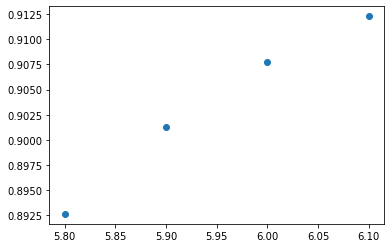

In [47]:
plt.scatter(wa_list, fidelity_list)

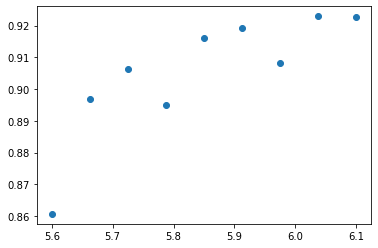

In [25]:
plt.scatter(wa_list[:9], fidelity_list)